# Focusing light with a lens

In this example, we will analyze how light is focused using a lens. We will use several algorithms.
From an ondulatory point of view, a lens as a transmittance object

$t(\xi,\eta)=P(\xi,\eta)\exp\left[-ik\frac{\left(\xi^{2}+\eta^{2}\right)}{2f'}\right]$ 

where $P(\xi,\eta)$ is the shape of the lens, $k=2\pi/\lambda$ and f' is the focal distance of the lens.

## Lens in x mode

In [1]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.utils_optics import beam_width_1D, FWHM1D, MTF_ideal, MTF_parameters

number of processors: 8


In [2]:
%matplotlib inline  

from matplotlib import rcParams
rcParams['figure.figsize']=(7,5)
rcParams['figure.dpi']=125

In [3]:
focal=25*mm
diameter=4*mm

# Initial parameters
x0 = np.linspace(-diameter/2-50*um, diameter/2+50*um, 1024*32)
wavelength = 0.6238 * um


# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, radius=diameter/2, focal=focal, mask=True);

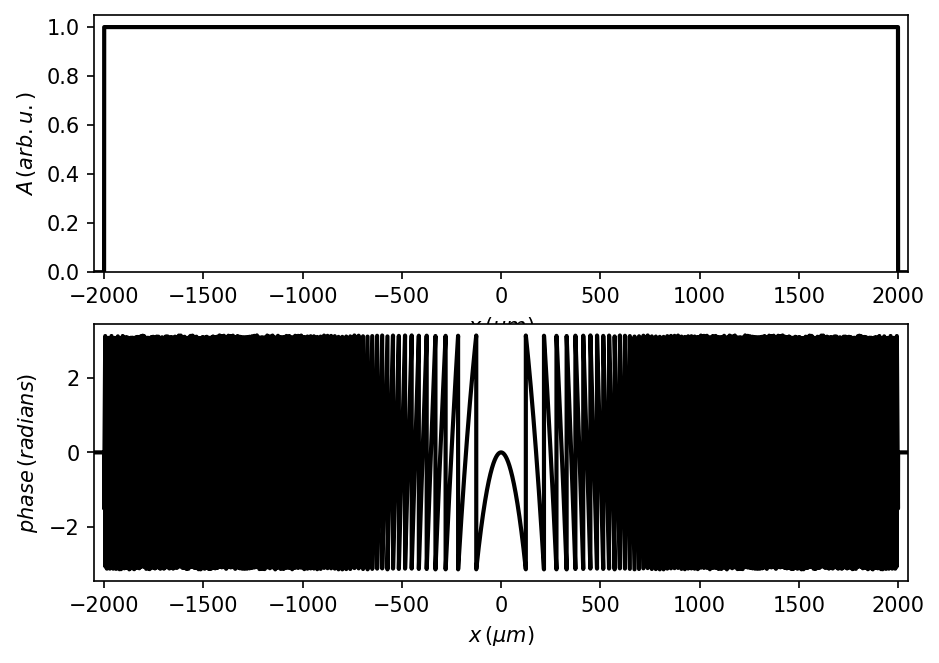

In [4]:
t0.draw('field')

In [5]:
u1=t0*u0
u2=u1.RS(z=focal, verbose=False);

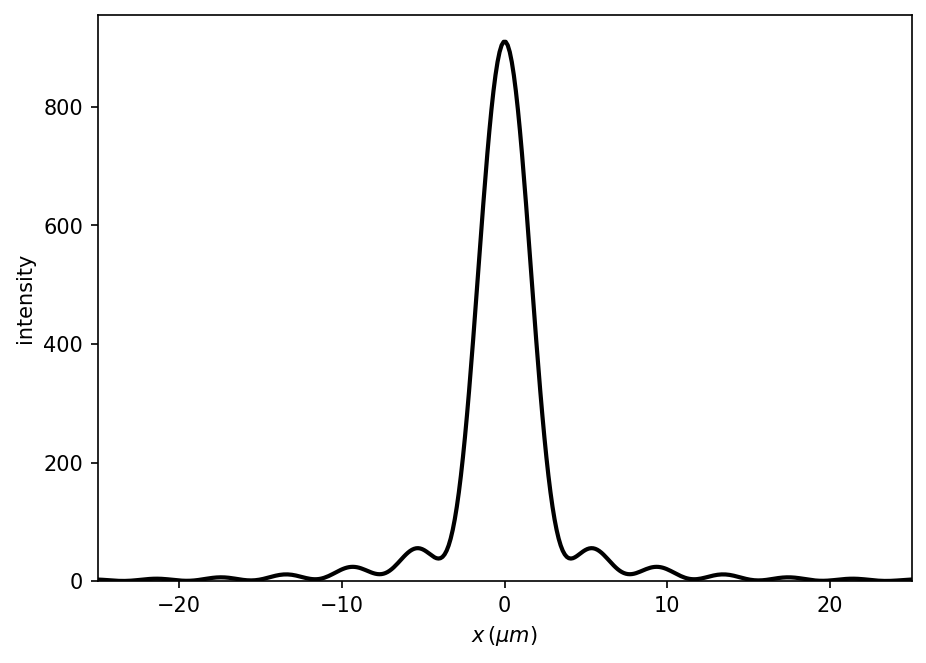

In [6]:
u2.draw()
plt.xlim(-25,25);

### Beam width computation

In [7]:
width,center=beam_width_1D(u2.u,u2.x)

4.8440465977023655 3.6107705034501123


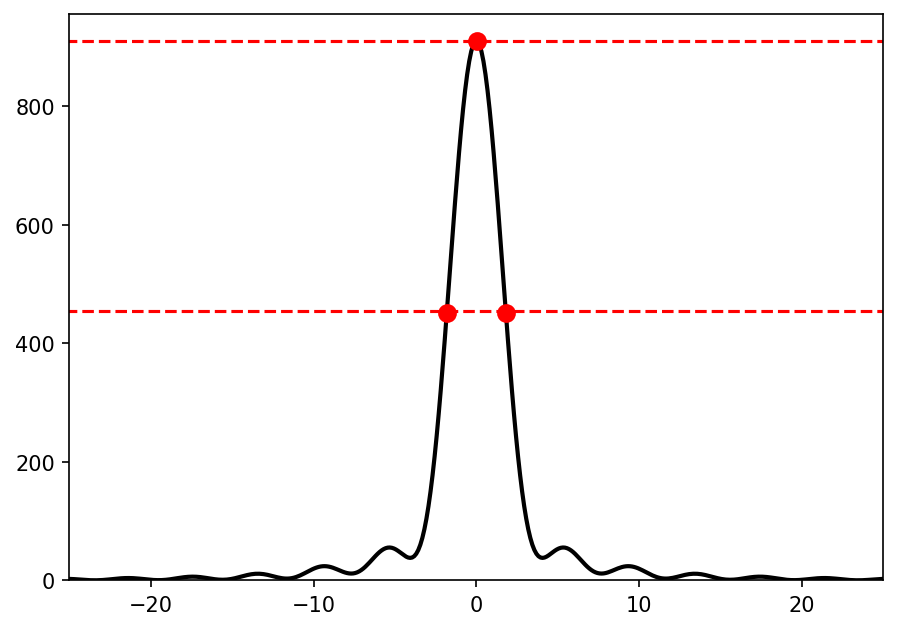

In [8]:
fwhm=FWHM1D(u2.x, np.abs(u2.u)**2, has_draw=True, percentaje=0.5)
plt.xlim(-25,25)
plt.ylim(bottom=0)
print(width, fwhm)

### MTF

frecuencia de corte = 256.49 lineas/mm


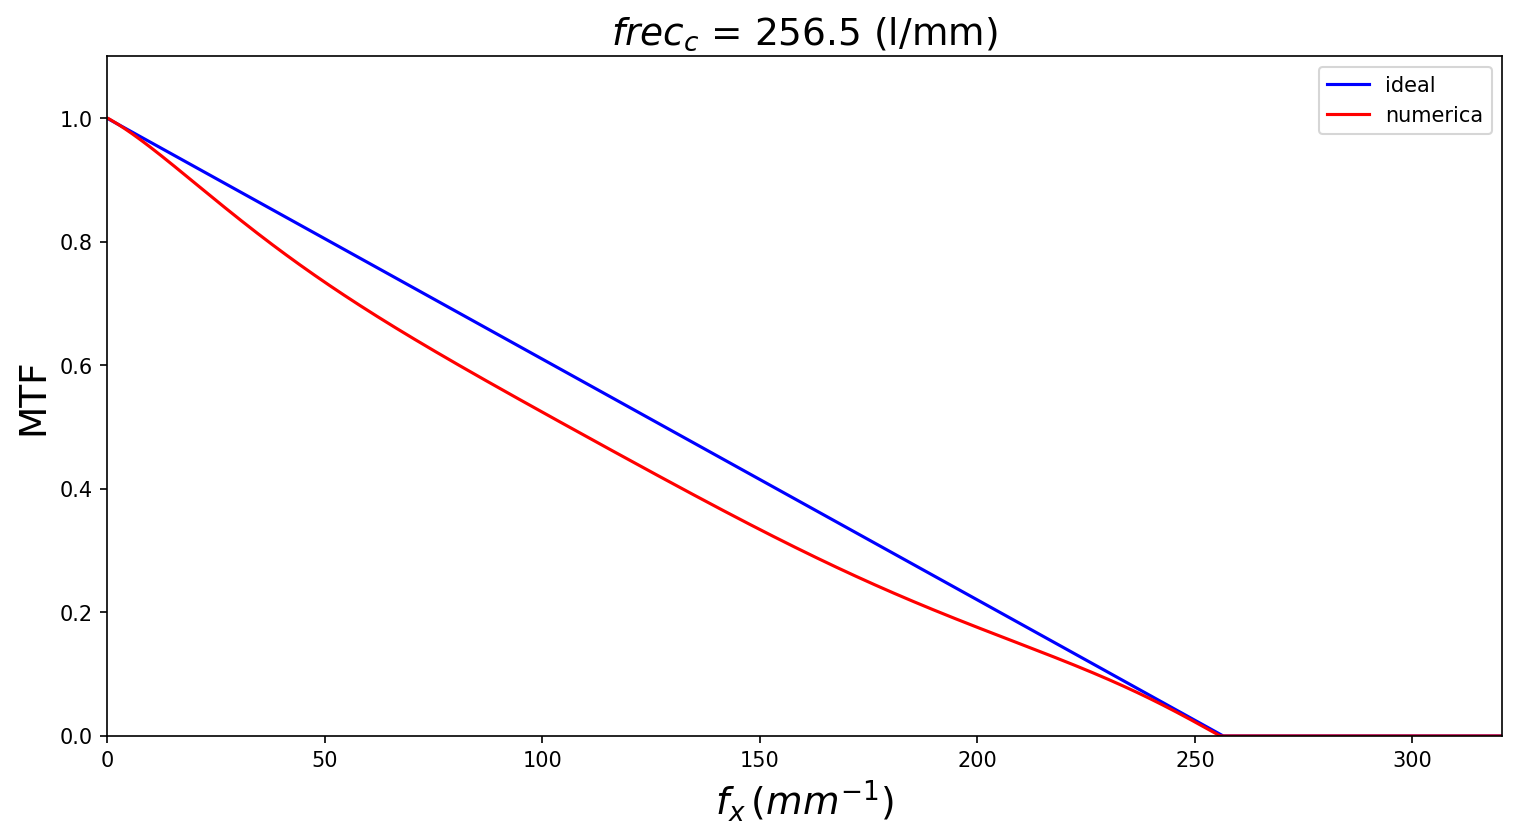

In [9]:
freq_real, mtf_norm=u2.MTF(has_draw=False);



freq_ideal=np.linspace(0, 350,600) 
mtf_ideal, freq_corte=MTF_ideal(freq_ideal, wavelength=wavelength, diameter=diameter,
                        focal=focal, kind='1D', has_draw=False, verbose=True)


plt.figure(figsize=(12,6))
plt.plot(freq_ideal,mtf_ideal,'b', label='ideal')
plt.xlabel("$f_x\,(mm^{-1})$", fontsize=18)
plt.ylabel("MTF", fontsize=18)
plt.xlim(left=0, right=1.25*freq_corte)
plt.ylim(bottom=0, top=1.1)
plt.title("$frec_c$ = {:2.1f} (l/mm)".format(freq_corte), fontsize=18)

#plt.plot(4*x_mtf_new, mtf_new,'r', label='numerica')
plt.plot(freq_real, mtf_norm,'r', label='numerica')

plt.legend(fontsize=16);

plt.legend();

### Several rays

In [10]:
# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_waves_several_inclined(A=1, num_beams=7, max_angle=10*degrees)

In [11]:
us1=t0*u0
us2=us1.RS(z=focal, verbose=False);

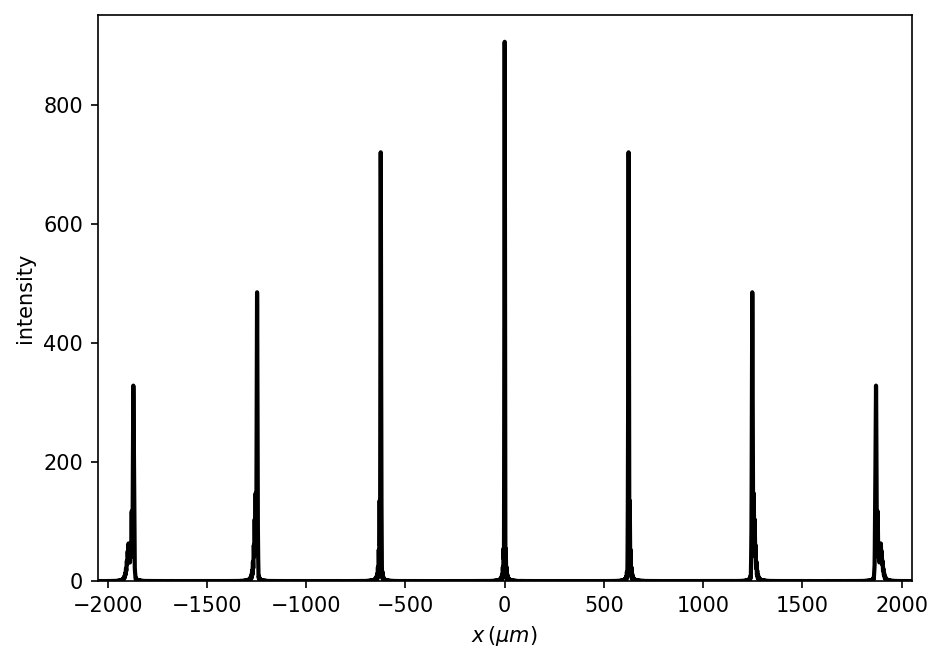

In [12]:
us2.draw();

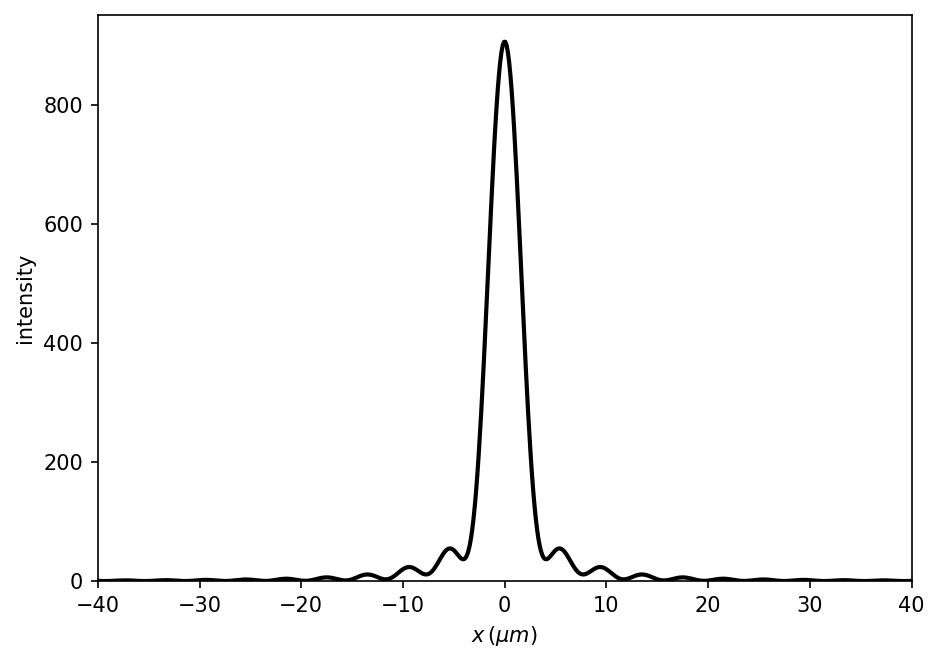

In [13]:
us2.draw()
plt.xlim(-40,40);

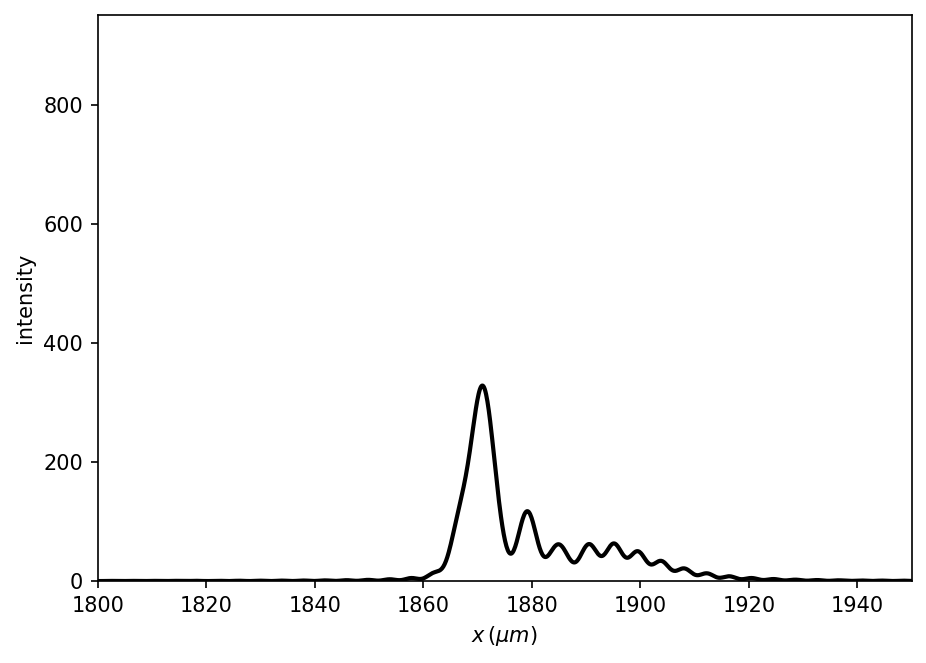

In [14]:
us2.draw()
plt.xlim(1800,1950);

### Binary Fresnel lens

With the modules diffractio.scalar_sources_X, scalar_fields_X and scalar_masks_X for propagating a field generated by a scalar light only the propagation to a given distances is performed. If you need to visualize the z propagation it is better the use of `diffractio.scalar_fields_XZ`, since it performs a for loop over a number of distances given by a linspace array. This for loop is executed, when possible, using multiprocessing, since there is not computational interaction between different locations z. 

In [15]:
# initial data 
x0 = np.linspace(-750*um, 750*um, 1024*32)
wavelength = 0.6238 * um
focal=20*mm
radius=250*um

#definition of source
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

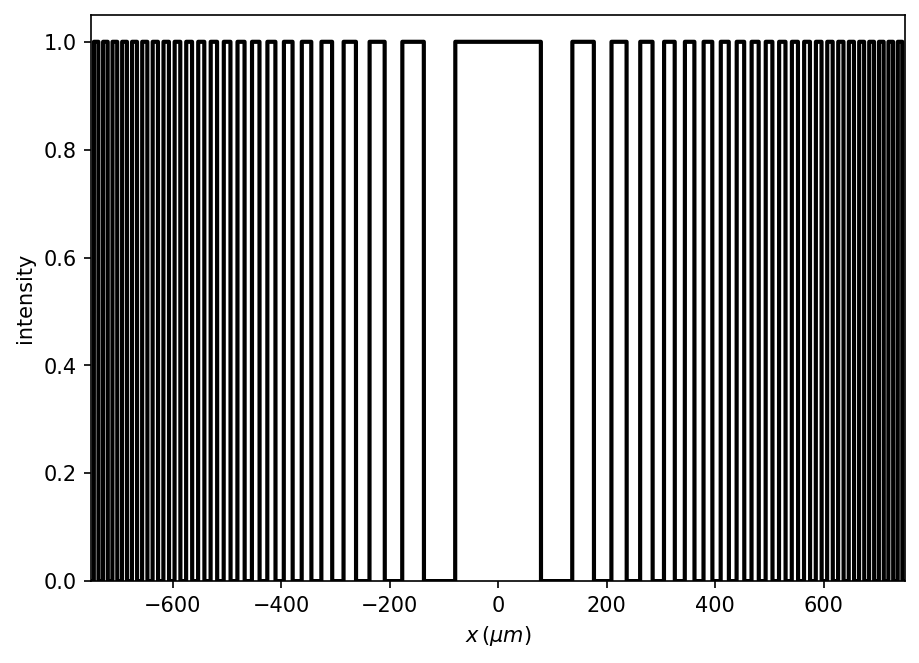

In [16]:
#definition of mask
t0 = Scalar_mask_X(x0, wavelength)
t0.fresnel_lens(
        x0=0 * um,
        radius=radius,
        focal=focal,
        mask=False,
        kind='amplitude',
        phase=np.pi)
t0.draw(kind='intensity')

In [17]:
u1=t0.RS(z=20*mm)

Good result: factor 359.69


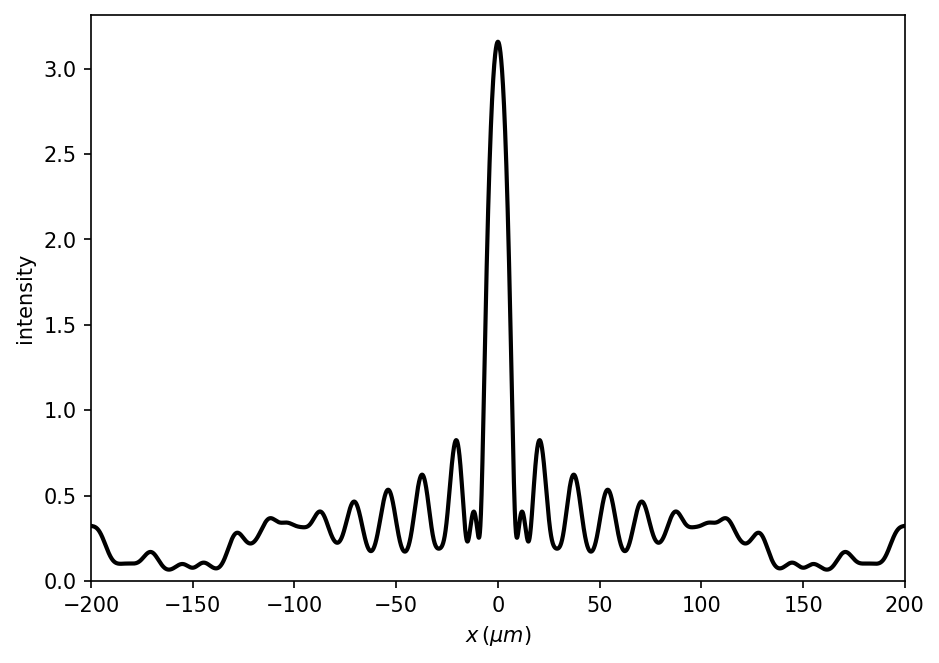

In [18]:
u1.draw(logarithm=1, normalize='intensity')
plt.xlim(-200,200);

## XZ lens: RS formalism

In [19]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [20]:
focal=15*mm
diameter=4*mm

x0 = np.linspace(-diameter/2, diameter/2, 1024*2)
z0 = np.linspace(14*mm, 16*mm, 512)
wavelength = 0.6238 * um



u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0*degrees)

t0= Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, radius=diameter/2, focal=focal, mask=True);

u1=u0*t0

In [21]:
u2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u2.incident_field(u1)
u2.RS(num_processors=4);

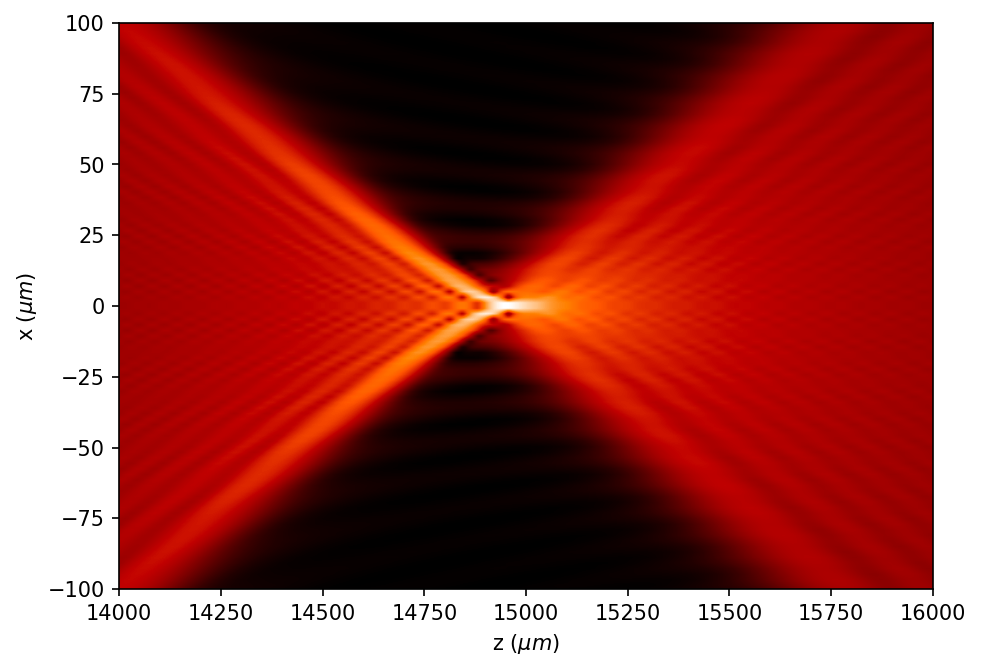

In [22]:
u2.draw(logarithm=True);
plt.ylim(-100*um,100*um);

In [23]:
x_f,z_f=u2.search_focus()

x = 0.977 um, z = 14951.076 um


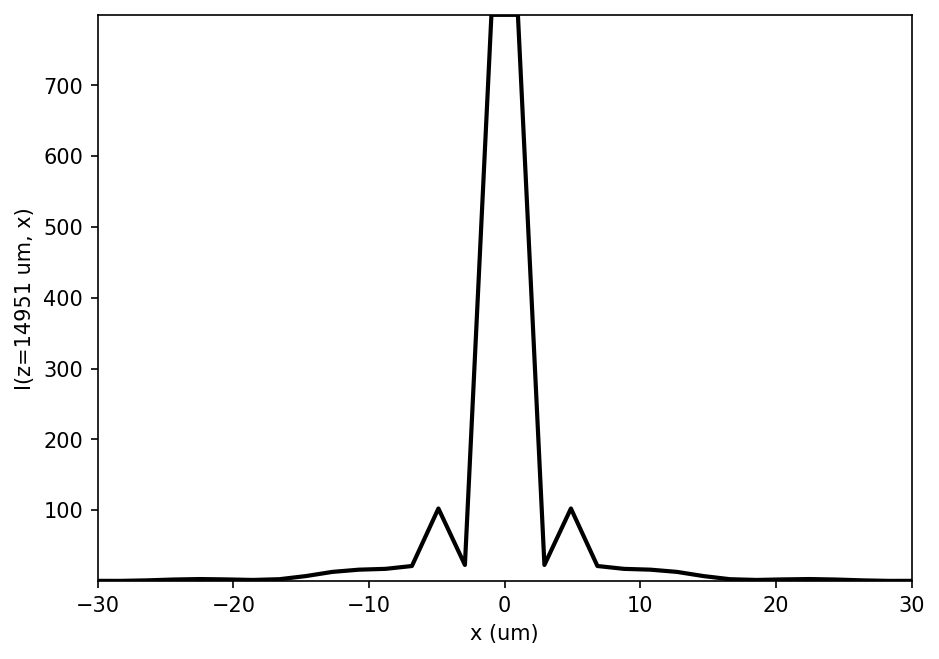

In [24]:
u2.profile_transversal(z0=z_f)
plt.xlim(-30,30);

### XZ lens: BPM formalism

800.0


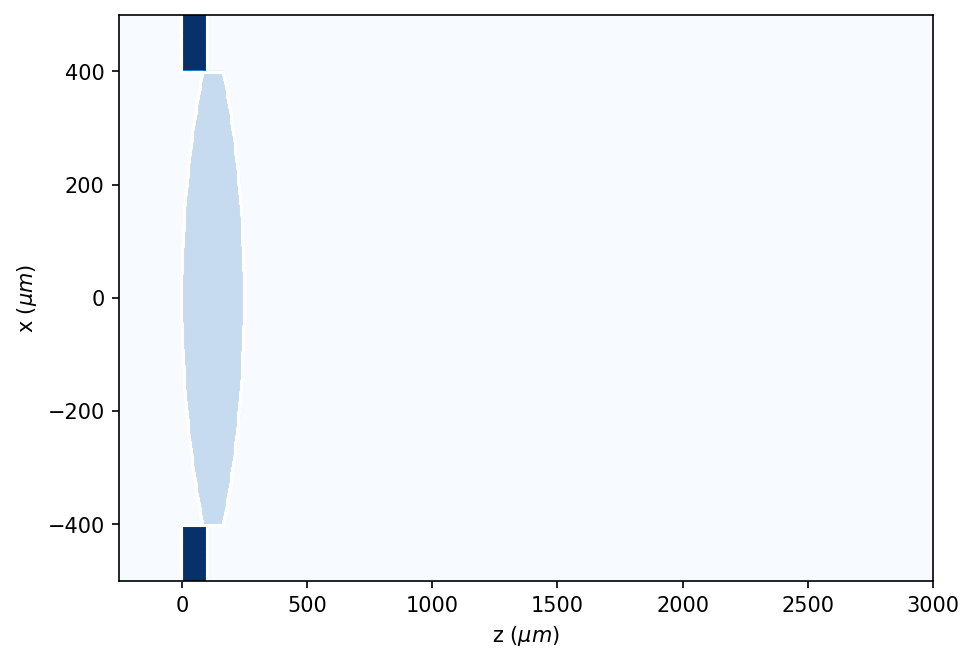

In [25]:
focal=1*mm
diameter=1*mm

x0 = np.linspace(-diameter/2, diameter/2, 1024*4)
z0 = np.linspace(-250 * um, focal+2*mm, 1024)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0*degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal,_ = u1.lens_convergent(
    r0=(0, 0),
    aperture=diameter/1.25,
    radius=(1*mm, -1*mm),
    thickness=.25* mm,
    refraction_index=1.5,
    angle=0 * degrees,
    mask=(100 * um, 3 + 0.1j))
print(focal)
u1.draw_refraction_index()
edge_matrix=u1.borders

u1.filter_refraction_index(type_filter=2, pixels_filtering=50);


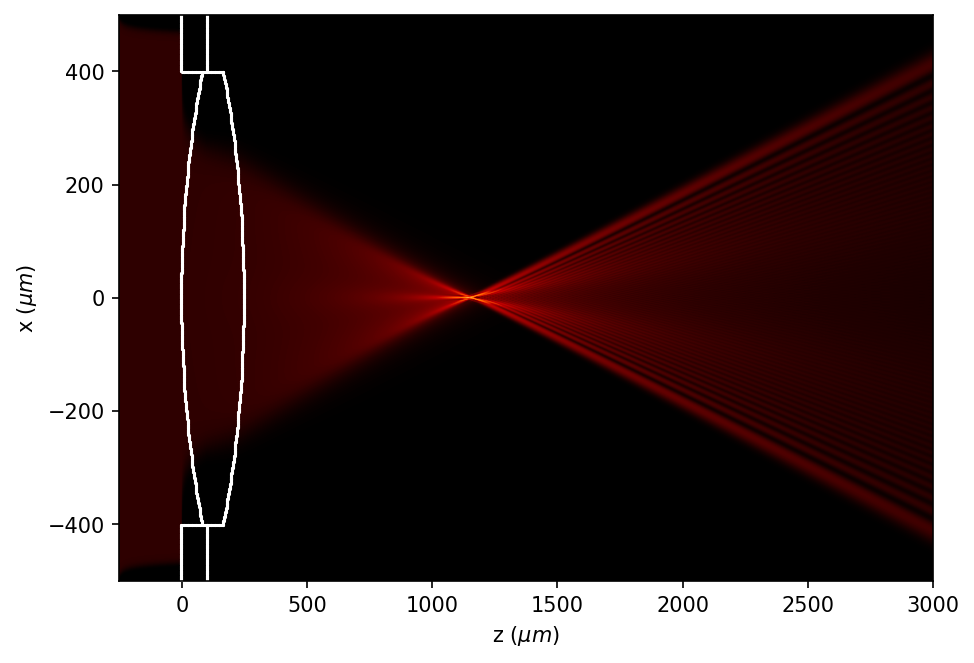

In [26]:
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True,  edge_matrix=edge_matrix);

In [27]:
x_focus,z_focus=u1.search_focus()

x = -0.122 um, z = 1151.026 um


In [28]:
width,z_center=u1.beam_widths()

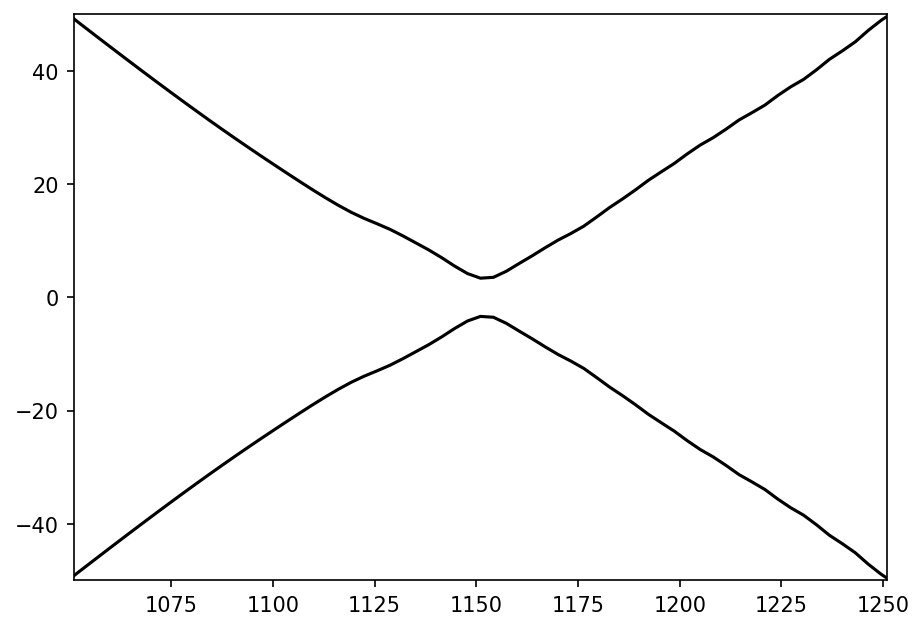

In [29]:
plt.plot(u1.z,width,'k')
plt.plot(u1.z,-width,'k')
plt.xlim(z_focus-100*um,z_focus+100*um)
plt.ylim(-50,50);

## Effect of rotation

In [30]:
x0 = np.linspace(-200 * um, 200 * um, 1024*2)
z0 = np.linspace(-50 * um, 400 * um, 1024 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0*degrees)


185.18518518518516


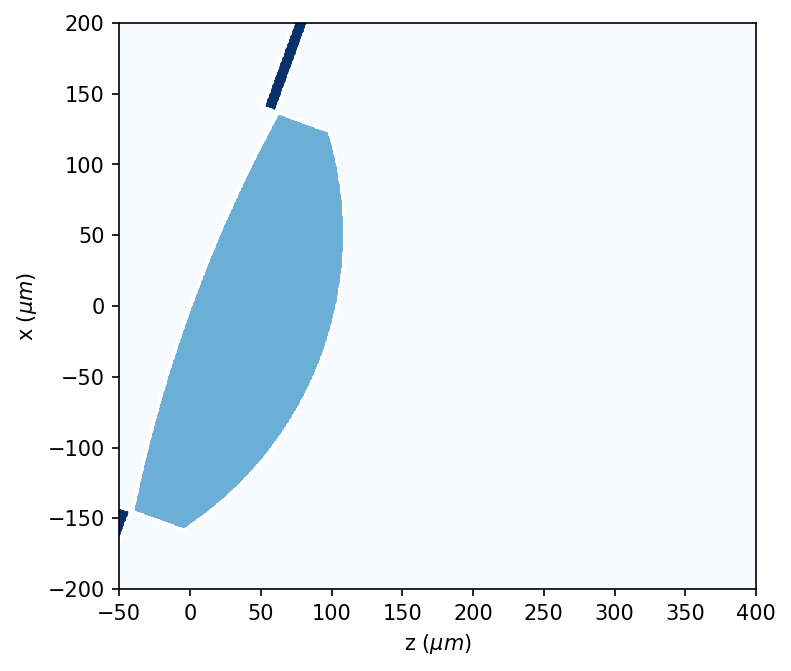

In [31]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal,_ = u1.lens_convergent(
    r0=(0, 0),
    aperture=300 * um,
    radius=(1000 * um, -250 * um),
    thickness=100 * um,
    refraction_index=2,
    angle=20 * degrees,
    mask=(10 * um, 3 + 0.05j))
print(focal)
u1.draw_refraction_index(scale='scaled')
edge_matrix=u1.borders

u1.filter_refraction_index(pixels_filtering=25,type_filter=2);

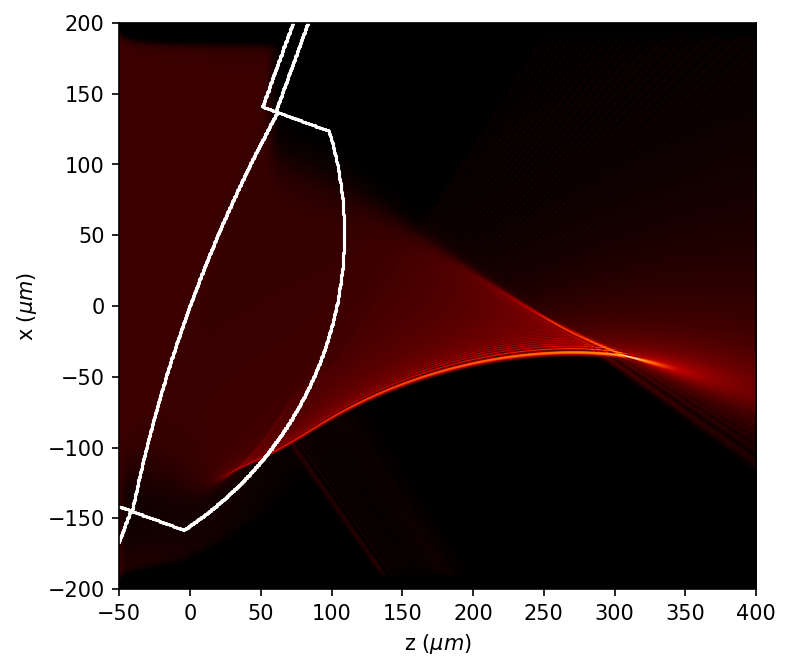

In [32]:
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, 
        scale='scaled', edge_matrix=edge_matrix);

In [33]:
x_f,z_f=u1.search_focus()

x = -36.053 um, z = 309.231 um


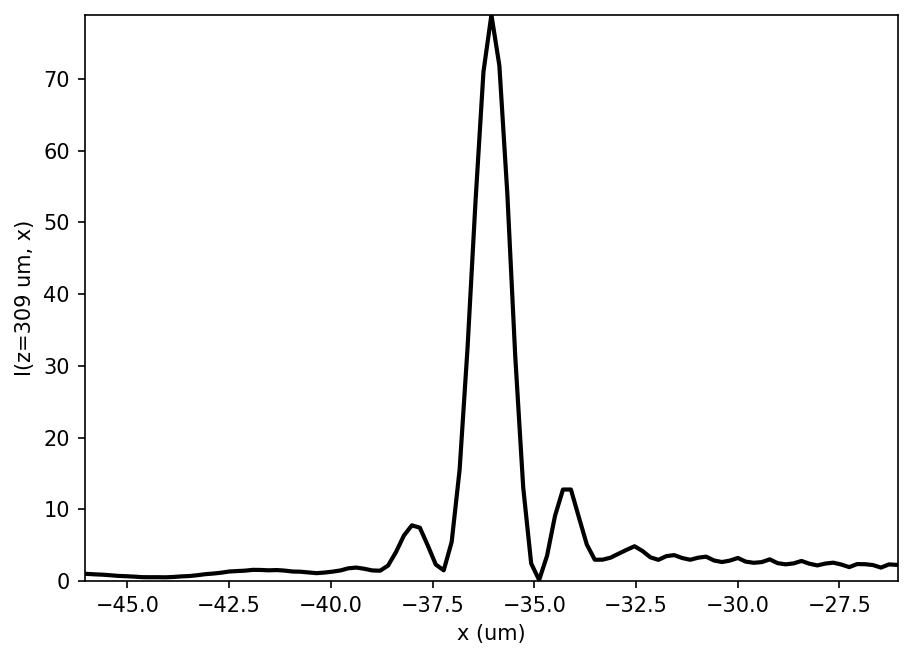

In [34]:
u1.profile_transversal(z0=z_f, draw=True);
plt.xlim(x_f-10,x_f+10);

In [35]:
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [36]:
x0 = np.linspace(-200 * um, 200 * um, 1024 * 1)
z0 = np.linspace(-25 * um, 400 * um, 1024 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beams_several_parallel(A=1,
    num_beams=10, w0=5, z0=10, x_central=0.0, x_range=200.0, theta=0.0)

185.18518518518516


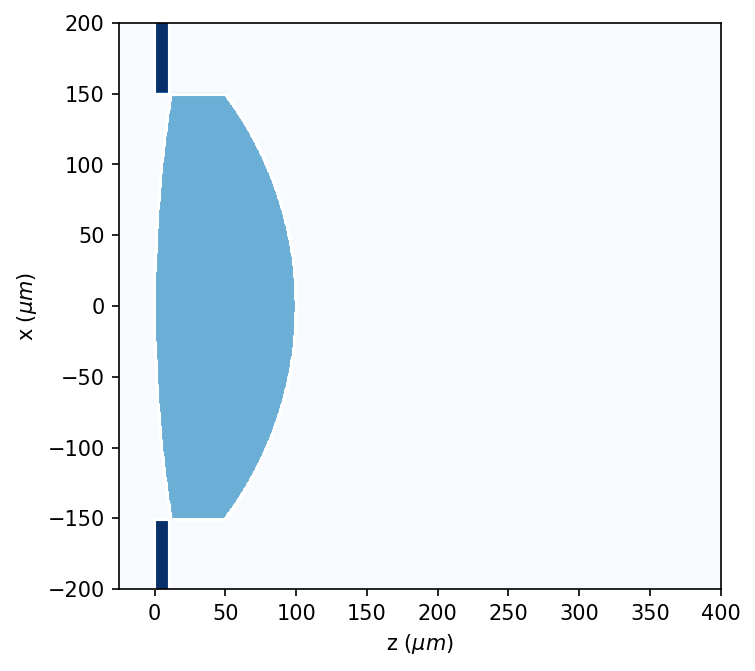

In [37]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal,_ = u1.lens_convergent(
    r0=(0, 0),
    aperture=300 * um,
    radius=(1000 * um, -250 * um),
    thickness=100 * um,
    refraction_index=2,
    angle=0 * degrees,
    mask=(10 * um, 3 + 0.05j))
print(focal)
u1.draw_refraction_index(scale='scaled')
edge_matrix=u1.borders

u1.filter_refraction_index(pixels_filtering=25,type_filter=2);

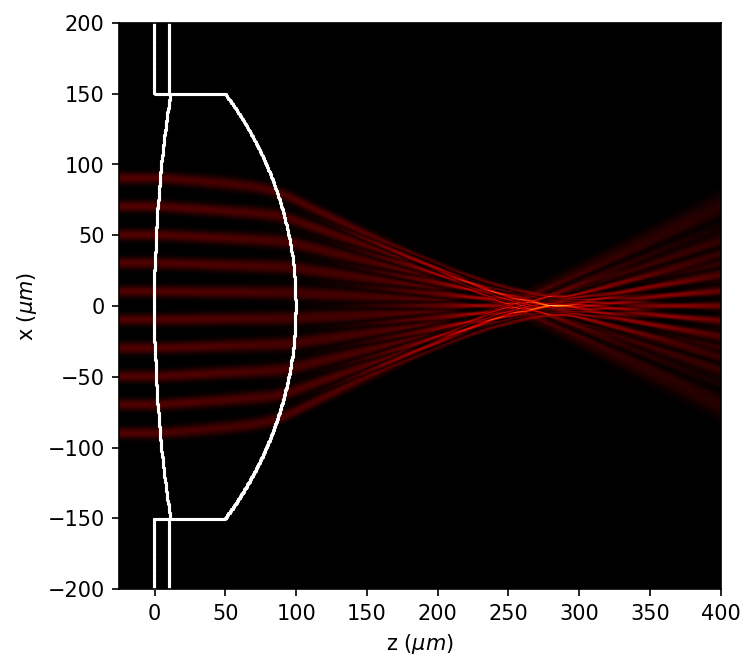

In [38]:
u1.BPM(verbose=False)
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, 
        scale='scaled', edge_matrix=edge_matrix);

### XY formalism

In [39]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [40]:
diameter=2*mm
focal=25*mm


x0 = np.linspace(-diameter/2,diameter/2,1024)
y0 =  np.linspace(-diameter/2,diameter/2,1024)
wavelength = 0.6238 * um

In [41]:

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um), radius=(diameter/2,diameter/2), focal=(focal,focal))


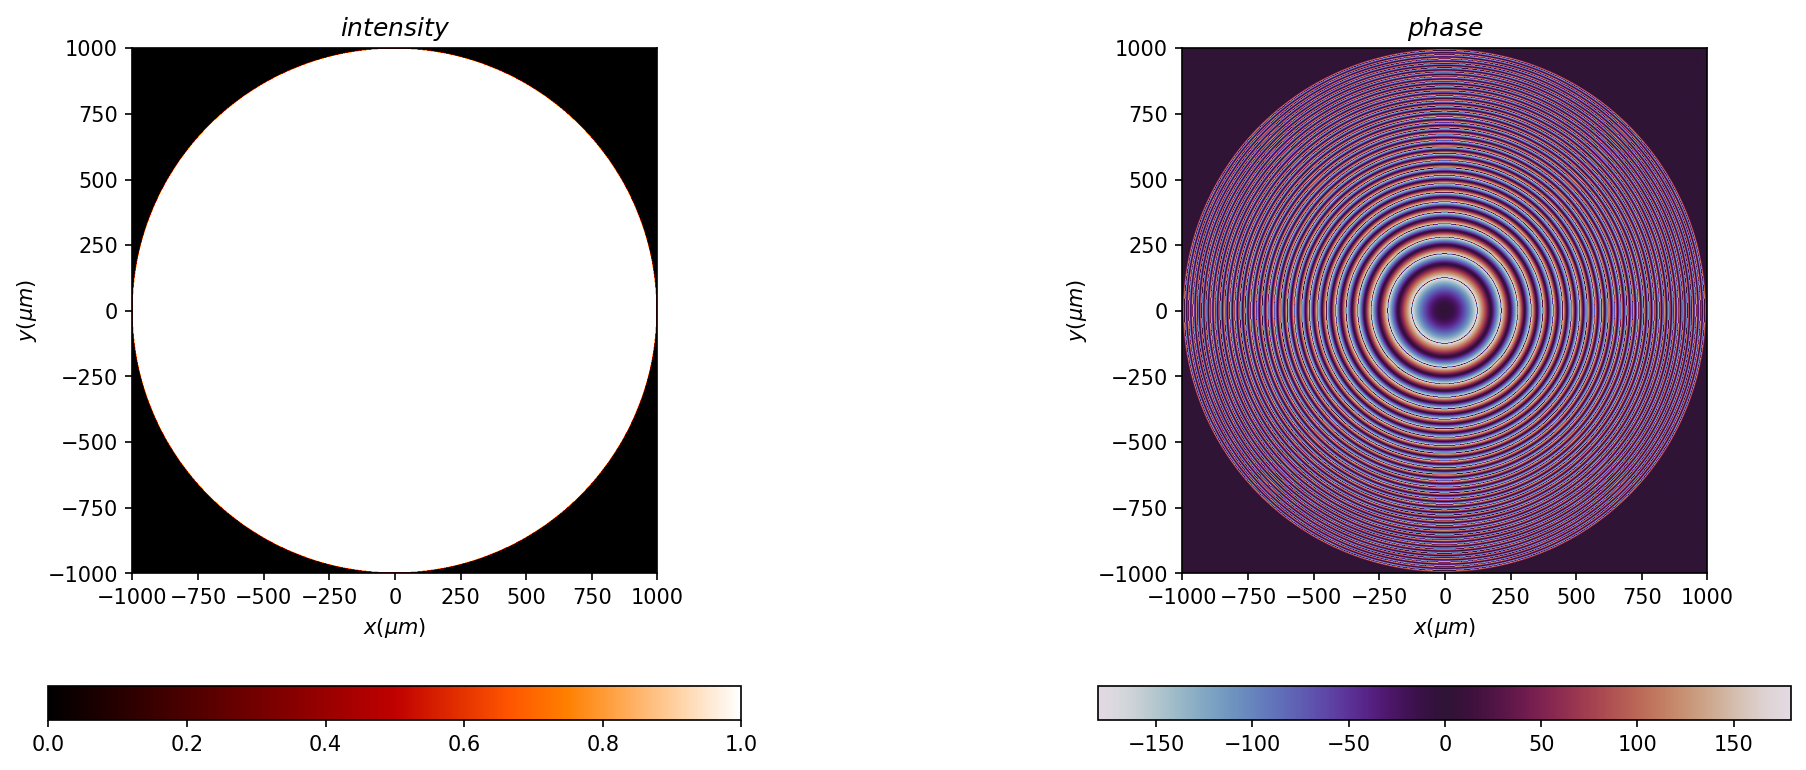

In [42]:
t0.draw('field');

In [43]:
u1=u0*t0

In [44]:
u2=u1.RS(z=focal)

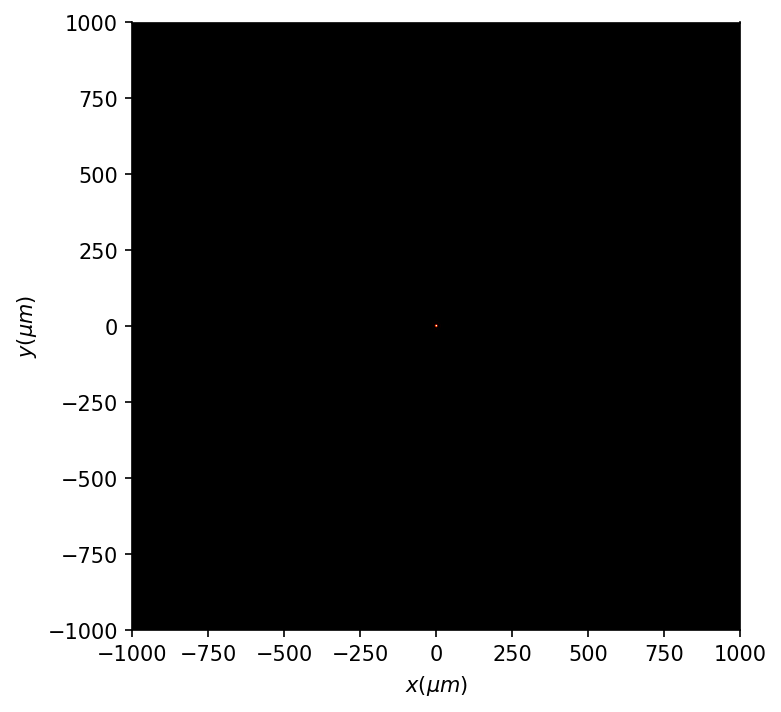

In [45]:
u2.draw();

In [46]:
u2.cut_resample( x_limits=(-25,25),
    y_limits=(-25,25),
    num_points=(1024,1024),
    new_field=False,
    interp_kind=(3, 1))

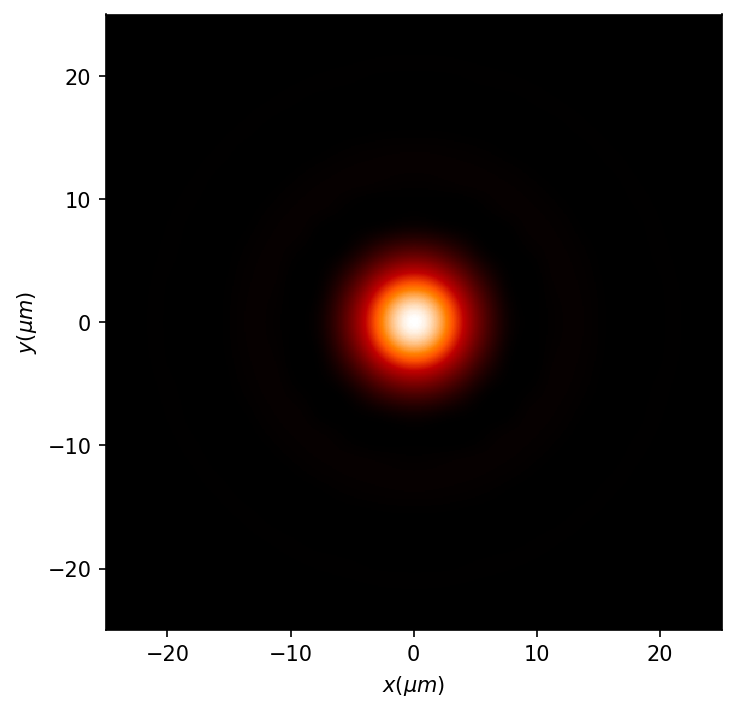

In [47]:
u2.draw();

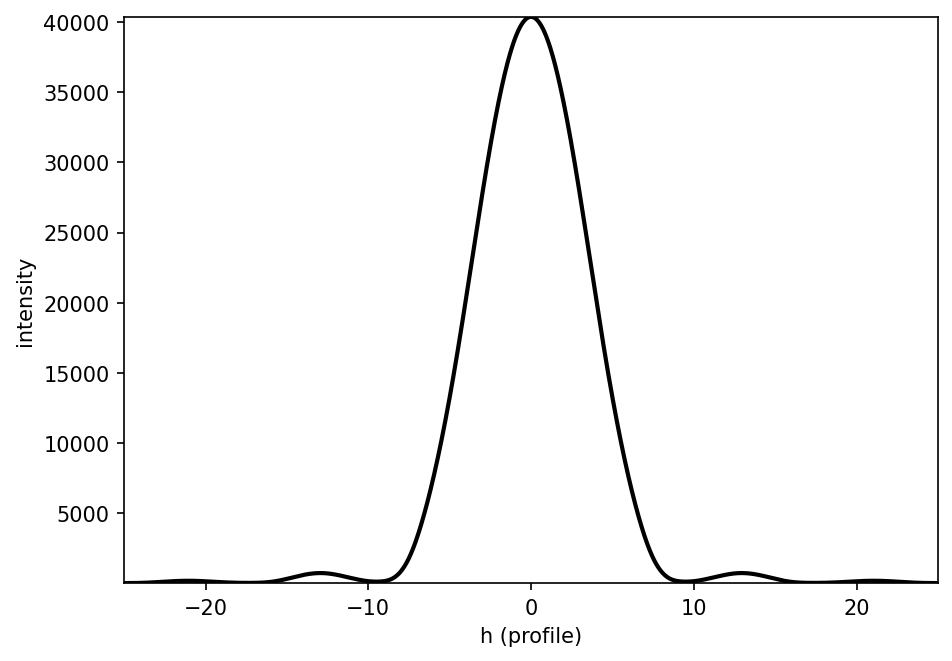

In [48]:
u2.draw_profile( point1=(-25,0),
    point2=(25,0),
    npixels=2048,
    kind='intensity',
    order=2);

In [49]:
def intensity_area(u, r0, radius, power=1, has_draw=True):
    intensities=np.zeros_like(radius)
    mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

    for i,r in enumerate(radius):
        mask.circle(r0=r0, radius=(r,r), angle=0)
        masked_field=u*mask
        intensities[i]=masked_field.intensity().sum()**power
    
    intensities=intensities/intensities.max()
    if has_draw is True:
        plt.figure()
        plt.plot(rs,intensities)
        plt.ylim(bottom=0)
        plt.xlim(left=0, right=rs[-1])
    return intensities

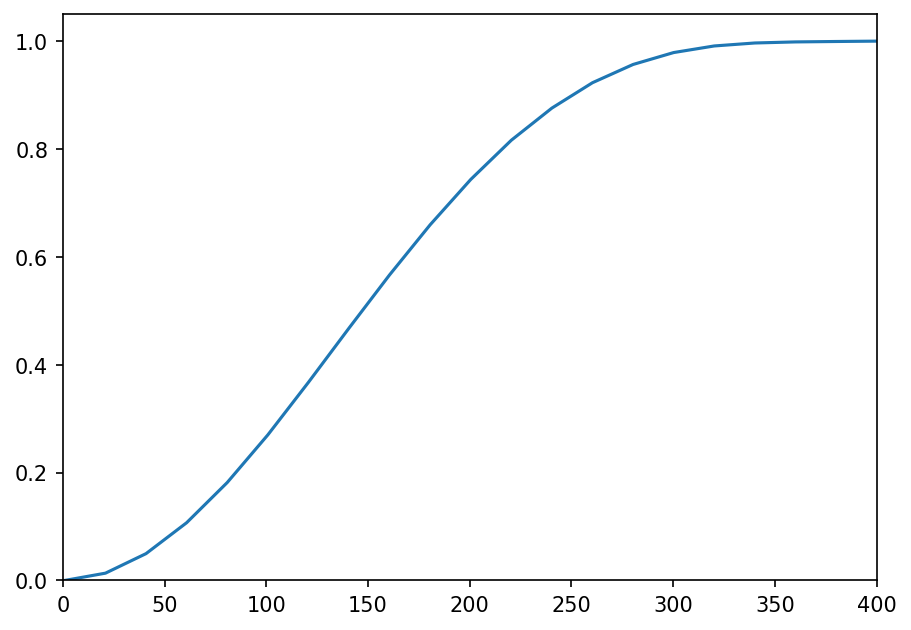

In [50]:
rs=np.linspace(1*um,400*um,21)
intensities=intensity_area(u2,r0=(0,0), radius=rs,power=1)

In [51]:
from diffractio.utils_math import nearest

i_near, value, error= nearest(intensities,0.5)
width_area=rs[i_near]
print(width_area)

140.65


## Vector formalism

### Linear polarization

In [67]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_paraxial_sources_XY import Vector_paraxial_source_XY
from diffractio.vector_paraxial_masks_XY import Vector_paraxial_mask_XY
from diffractio.vector_paraxial_fields_XY import Vector_paraxial_field_XY


In [68]:
diameter=2*mm
x0 = np.linspace(-diameter/2,diameter/2,1024)
y0 = np.linspace(-diameter/2,diameter/2,1024)
wavelength = 0.6238 * um


In [69]:
focal=25*mm
Df=0.25*mm
limit=50*um


In [70]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um), radius=(diameter/2,diameter/2), focal=(focal,focal))

u1=u0*t0

In [71]:
EM0 = Vector_paraxial_source_XY(x0, y0, wavelength)
EM0.constant_wave(u1,v=[(1-1j)/2, (1+1j)/2])

In [78]:
EM1=EM0.RS(z=focal-Df)

In [79]:
EM1.cut_resample( x_limits=(-limit/2,limit/2),
    y_limits=(-limit/2,limit/2),
    num_points=(1024,1024),
    new_field=False,
    interp_kind=(3, 1))

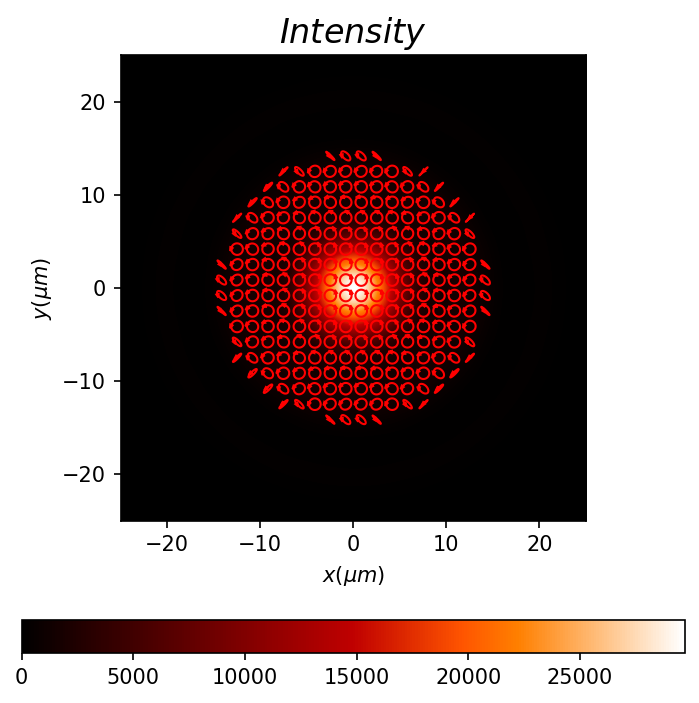

In [80]:
EM1.__draw_ellipses__(num_ellipses=(30,30), color_line='r', amplification=0.75,  head_width=.25);

### Radial polarization

In [81]:
diameter=2*mm

x0 = np.linspace(-diameter/2,diameter/2,1024)
y0 = np.linspace(-diameter/2,diameter/2,1024)
wavelength = 0.6238 * um


In [82]:
focal=25*mm


In [83]:
u0=Scalar_source_XY(x0,y0,wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um), radius=(diameter/2,diameter/2), focal=(focal,focal))

u1=u0*t0

In [84]:
EM0 = Vector_paraxial_source_XY(x0, y0, wavelength)
EM0.radial_wave(u1)

In [85]:
EM1=EM0.RS(z=focal-Df)


In [87]:
EM1.cut_resample( x_limits=(-limit/2,limit/2),
    y_limits=(-limit/2,limit/2),
    num_points=(1024,1024),
    new_field=False,
    interp_kind=(3, 1))

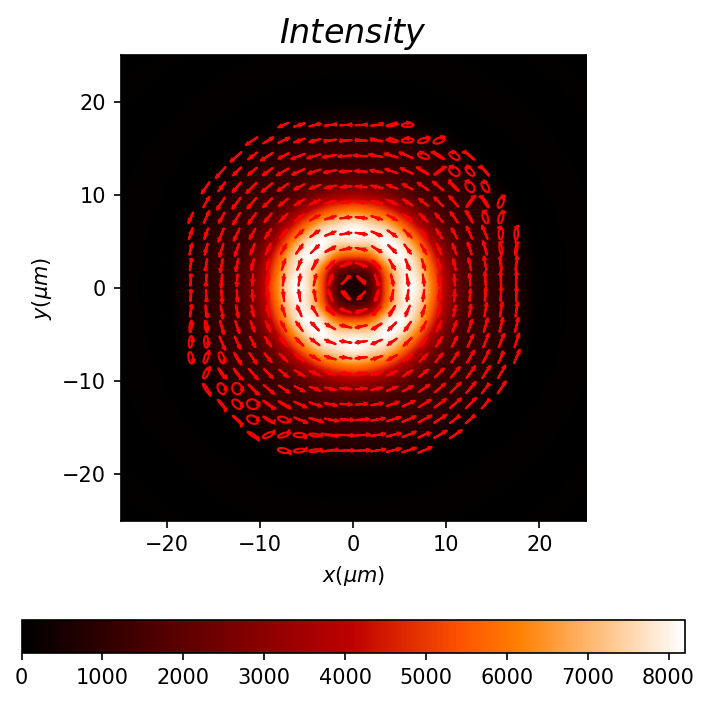

In [88]:
EM1.__draw_ellipses__(num_ellipses=(30,30), color_line='r', amplification=0.75,  head_width=.25);
